# Air Quality Index (AQI) Analysis in Delhi


## Research Questions:
<li>What are the trends and seasonal variations of AQI and key pollutants in Delhi?</li>

<li>Which pollutants most strongly influence AQI levels?</li>

<li>How do geographical (seasonal) factors affect pollutant concentrations?</li>

<li>What are the critical time periods (hour/month/season) for poor air quality?</li>

## 1. Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the dataset
df = pd.read_csv('delhiaqi.csv')

# Display the first few rows
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


## 2. Data Preprocessing
We'll convert date to datetime, extract temporal features (month, season, hour), and check for missing values.

In [2]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

# Check for missing values
df.isnull().sum()

date      0
co        0
no        0
no2       0
o3        0
so2       0
pm2_5     0
pm10      0
nh3       0
year      0
month     0
hour      0
season    0
dtype: int64

## 3. Statistical Summary and Correlation Analysis
Explore data distribution, summary statistics, and correlation between pollutants.

                      date            co          no         no2          o3  \
count                  561    561.000000  561.000000  561.000000  561.000000   
mean   2023-01-12 16:00:00   3814.942210   51.181979   75.292496   30.141943   
min    2023-01-01 00:00:00    654.220000    0.000000   13.370000    0.000000   
25%    2023-01-06 20:00:00   1708.980000    3.380000   44.550000    0.070000   
50%    2023-01-12 16:00:00   2590.180000   13.300000   63.750000   11.800000   
75%    2023-01-18 12:00:00   4432.680000   59.010000   97.330000   47.210000   
max    2023-01-24 08:00:00  16876.220000  425.580000  263.210000  164.510000   
std                    NaN   3227.744681   83.904476   42.473791   39.979405   

              so2        pm2_5         pm10         nh3    year  month  \
count  561.000000   561.000000   561.000000  561.000000   561.0  561.0   
mean    64.655936   358.256364   420.988414   26.425062  2023.0    1.0   
min      5.250000    60.100000    69.080000    0.630000  

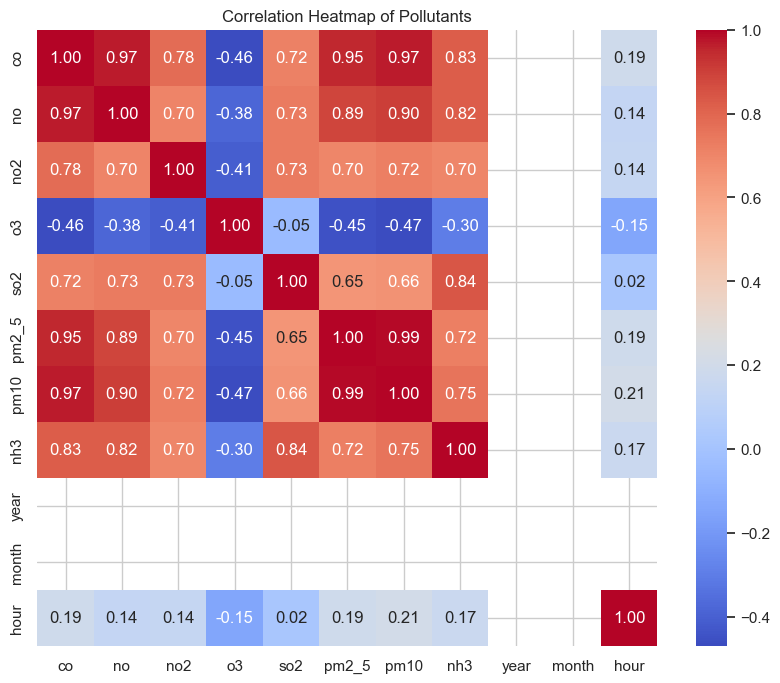

In [4]:
# Descriptive statistics
print(df.describe())

# Correlation heatmap (numeric columns only)
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Pollutants")
plt.show()

## 4. Time Series Analysis of Pollutants
Visualize pollutant trends over:
<ol>Hour of the day</ol>
<ol>Month/season</ol>
<ol>Yearly average</ol>

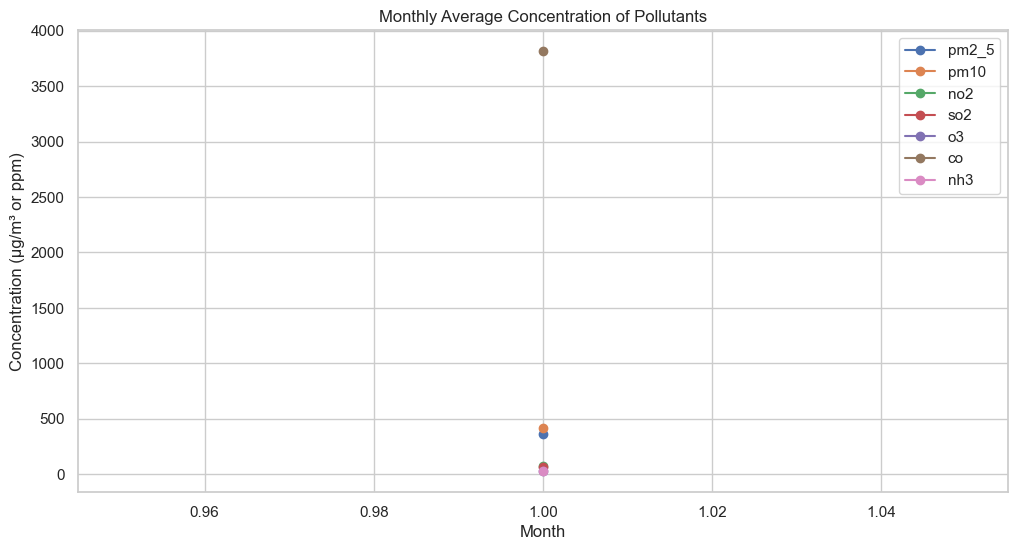

In [5]:
# Plot average values by month
monthly_avg = df.groupby('month')[['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'co', 'nh3']].mean()

monthly_avg.plot(marker='o')
plt.title('Monthly Average Concentration of Pollutants')
plt.ylabel('Concentration (µg/m³ or ppm)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

## 5. Seasonal Variations
Visualize seasonal patterns in pollutants and AQI

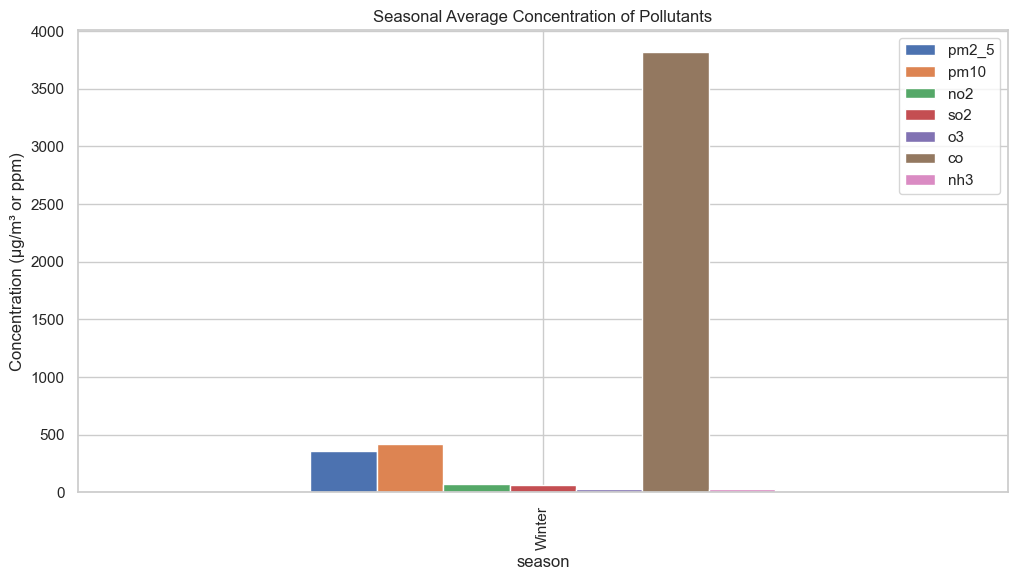

In [6]:
seasonal_avg = df.groupby('season')[['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'co', 'nh3']].mean()
seasonal_avg.plot(kind='bar')
plt.title('Seasonal Average Concentration of Pollutants')
plt.ylabel('Concentration (µg/m³ or ppm)')
plt.grid(True)
plt.show()

## 6. Hourly Patterns

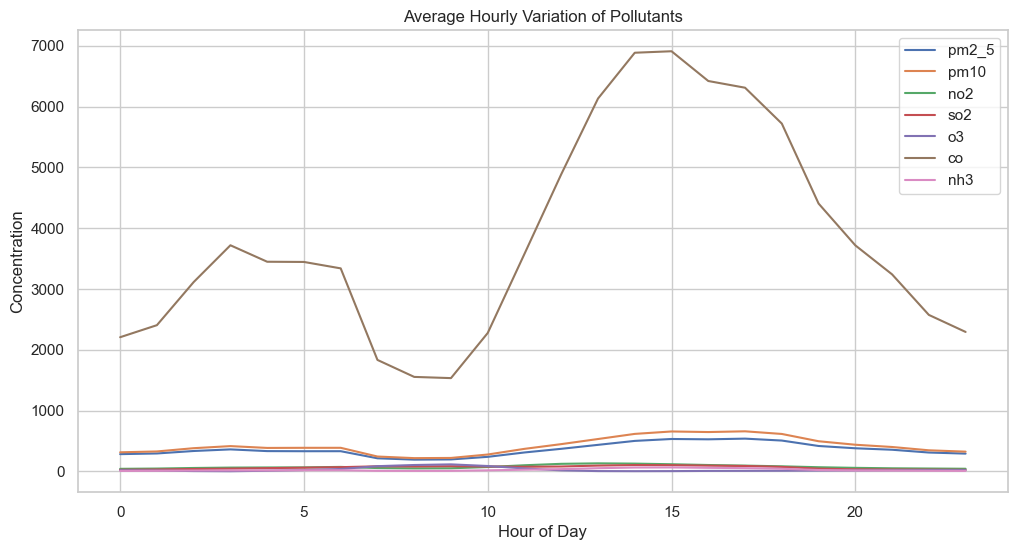

In [8]:
hourly_avg = df.groupby('hour')[['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'co', 'nh3']].mean()
hourly_avg.plot()
plt.title('Average Hourly Variation of Pollutants')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

## 7. Identifying Most Harmful Pollutants

In [11]:
assert 'pm2_5' in df.columns and 'pm10' in df.columns

# Compute correlations
corr_matrix = df.select_dtypes(include='number').corr()
corr_with_pm25 = corr_matrix['pm2_5'].sort_values(ascending=False)
corr_with_pm10 = corr_matrix['pm10'].sort_values(ascending=False)

print("Correlation with PM2.5:")
print(corr_with_pm25)

print("\nCorrelation with PM10:")
print(corr_with_pm10)

Correlation with PM2.5:
pm2_5    1.000000
pm10     0.994088
co       0.953083
no       0.888810
nh3      0.720303
no2      0.698696
so2      0.648996
hour     0.191102
o3      -0.450458
year          NaN
month         NaN
Name: pm2_5, dtype: float64

Correlation with PM10:
pm10     1.000000
pm2_5    0.994088
co       0.966801
no       0.903339
nh3      0.754468
no2      0.720050
so2      0.658325
hour     0.206265
o3      -0.468477
year          NaN
month         NaN
Name: pm10, dtype: float64


## 8. Recommendations

Based on the analysis:
- **PM2.5 and PM10** are consistently high during **Winter**, due to low wind speed, biomass burning, and temperature inversion.
- **NO₂ and CO** peak during **rush hours** indicating vehicular emission dominance.
- **O₃** peaks during the day due to photochemical reactions — particularly in summer.
- **Public health advisory** should be issued for early morning hours in winter.
- **Policy** focus: reduce vehicular emissions, control construction dust, and enforce cleaner fuel usage.


## 9. Save Cleaned Dataset 

In [13]:
# Save cleaned and enhanced dataset
df.to_csv('delhi_aqi_cleaned.csv', index=False)